In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')
from utils import deserialize, serialize

## Baselines

In [3]:
from test_signal import load_stat_dict
baseline_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/dummy_baseline_stats_final.obj"
baseline_dict = load_stat_dict(baseline_dict_path)

loading stat dict...


In [4]:
len(baseline_dict.keys())

30

In [5]:
G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/"
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

### run if you want more baselines

In [6]:
from test_signal import dummy_baseline
idx = 0
for size_range in [(1,1), (1,50), (1,100), (1,200), (1,500), (1,1000), (50,100), (100,200), (200,500), (500,1000)]:
    for num_samples in [3, 10, 25]:
        print(f"idx: {idx}")
        dummy_baseline(G_dir, label_dict, size_range, num_samples, baseline_dict_path)
        idx += 1
# for cutoff in [0]: #[0, 1, 10, 25]: # replicates, not actually cutoff


idx: 0
loading stat dict...
dummy_1-1_3
Skipping b/c already analyzed: dummy_1-1_3
idx: 1
loading stat dict...
dummy_1-1_10
Skipping b/c already analyzed: dummy_1-1_10
idx: 2
loading stat dict...
dummy_1-1_25
Skipping b/c already analyzed: dummy_1-1_25
idx: 3
loading stat dict...
dummy_1-50_3
Skipping b/c already analyzed: dummy_1-50_3
idx: 4
loading stat dict...
dummy_1-50_10
Skipping b/c already analyzed: dummy_1-50_10
idx: 5
loading stat dict...
dummy_1-50_25
Skipping b/c already analyzed: dummy_1-50_25
idx: 6
loading stat dict...
dummy_1-100_3
Skipping b/c already analyzed: dummy_1-100_3
idx: 7
loading stat dict...
dummy_1-100_10
Skipping b/c already analyzed: dummy_1-100_10
idx: 8
loading stat dict...
dummy_1-100_25
Skipping b/c already analyzed: dummy_1-100_25
idx: 9
loading stat dict...
dummy_1-200_3
Skipping b/c already analyzed: dummy_1-200_3
idx: 10
loading stat dict...
dummy_1-200_10
Skipping b/c already analyzed: dummy_1-200_10
idx: 11
loading stat dict...
dummy_1-200_25
Sk

In [7]:
baseline_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/dummy_baseline_stats_final.obj"
baseline_dict = load_stat_dict(baseline_dict_path)

loading stat dict...


In [8]:
len(baseline_dict.keys())

30

In [9]:
# baseline_dict

## Process results

In [10]:
# results_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/obsolete/cc_stat_dict_before_parallel.obj"
# results_dict = deserialize(results_dict_path)

In [11]:
# results_dict.keys()

In [12]:
results_dict = {}
results_dicts_path = "/scr/biggest/gmachi/datasets/celldive_lung/analysis_cache_final"
for file_str in os.listdir(results_dicts_path):
    if "stat_dict" not in file_str:
        continue
    rd = deserialize(os.path.join(results_dicts_path, file_str))
    results_dict[file_str.split(".stat_dict")[0]] = rd
    

In [13]:
# results_dict

In [14]:
# baseline_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/cc_stat_dict_BASELINES.obj"
# baseline_dict = deserialize(baseline_dict_path)

In [15]:
# filtered_dict = {}
# real_model_count = 0
# for idx, model in enumerate(results_dict.keys()):
#     print()
#     print(idx, model)
#     if type(results_dict[model]) == list or results_dict[model] == {}:
#         print("no success")
#         continue
#     else:
#         print("success!")
#     # for metric in results_dict[model]:
#         # print(metric)
#         # print(results_dict[model][metric])
#     filtered_dict[(model, idx)] = results_dict[model]
#     real_model_count += 1


In [16]:
# real_model_count

In [17]:
# aucs = [v["auc_score"][0] for v in filtered_dict.values()]
# scores = [v["auc_score"][1] for v in filtered_dict.values()]
# aucs1 = [v["auc_score_c1"][0] for v in filtered_dict.values()]
# scores1 = [v["auc_score_c1"][1] for v in filtered_dict.values()]
# aucs10 = [v["auc_score_c10"][0] for v in filtered_dict.values()]
# scores10 = [v["auc_score_c10"][1] for v in filtered_dict.values()]
# aucs25 = [v["auc_score_c25"][0] for v in filtered_dict.values()]
# scores25 = [v["auc_score_c25"][1] for v in filtered_dict.values()]

In [18]:
# # tnrs = [np.median(v["tnr"]) for v in filtered_dict.values()]


# tnrs = []
# for v in filtered_dict.values():
#     fprs = np.array(v["tnr"])
#     tnrs.append(np.median(1 - fprs))
    
# prevs = [np.median(v["prev"]) for v in filtered_dict.values()]
# disps = [np.median(v["disp"]) for v in filtered_dict.values()]
# idxs = [k[1] for k in filtered_dict.keys()]

In [19]:
# len(aucs)

## Plot the characteristics vs performance

In [20]:
# import seaborn as sns
# def setup_figure(width=3, height=3):
#     sns.set(style='white')
#     sns.set_context('paper')
#     plt.figure(figsize=(width,height))

In [21]:
# from scipy.interpolate import griddata
# Z = griddata((prevs, disps), tnrs, (prevs, disps), method='linear')
# Z.shape

In [22]:
# import matplotlib.pyplot as plt

# # Create scatter plot
# plt.figure(figsize=(4,3))
# top_idx = int(np.argmax(tnrs))
# # plt.tricontour(prevs, disps, tnrs)
# plt.scatter(prevs, disps, c=tnrs, s=80, alpha=0.6, cmap='viridis', vmin=0, vmax=1)
# plt.colorbar()
# text = [str(i) for i in idxs] 
# # Loop for annotation of all points 
# plt.annotate(text[top_idx], (prevs[top_idx]-0.02, disps[top_idx]-1.7)) 

# # Add labels and title
# plt.xlabel('Median Class-1 RP', fontsize=13)
# plt.ylabel('Median Class-1 MRD', fontsize=13)
# plt.title('Median Class-0 TNR per Model', fontsize=13)
# # Show plot
# plt.show()


In [23]:
# fig, axs = plt.subplots(2, 4, figsize=(10,5))
# text = [str(i) for i in idxs] 
# N = len(prevs)


# cutoffs = ["0", "1", "10", "25"]
# for i,metric in enumerate([aucs, aucs1, aucs10, aucs25]):
#     top_idx = int(np.argmax(metric))
#     axs[0,i].scatter(prevs, disps, c=metric, s=50, alpha=0.6, cmap='viridis', vmin=0.5, vmax=1)
#     axs[0,i].set_title("AUROC (c>" + cutoffs[i] + ")")
#     axs[0,i].set_xticks([])
#     if i > 0:
#         axs[0,i].set_yticks([])
#     axs[0,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 

# for i,metric in enumerate([scores, scores1, scores10, scores25]):
#     top_idx = int(np.argmax(metric))
#     im = axs[1,i].scatter(prevs, disps, c=metric, s=50, alpha=0.6, cmap='viridis', vmin=0.5, vmax=1)
#     axs[1,i].set_title("Acc (c>" + cutoffs[i] + ")")
#     if i > 0:
#         axs[1,i].set_yticks([])
#     axs[1,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 

# # im = axs[2,0].scatter(prevs, disps, c=tnrs, s=100, alpha=0.6, cmap='viridis', vmin=0.5, vmax=1)
# # for j in range(N): 
# #     axs[2,0].annotate(text[j], (prevs[j]+0.01, disps[j]+0.1)) 
    

# # Add labels and title
# fig.supxlabel('Median Class-1 RP', fontsize=13)
# fig.supylabel('Median Class-1 MRD', fontsize=13)
# plt.suptitle('Class-1 Region Predictiveness per Model', fontsize=13)
# # Show plot

# plt.tight_layout()

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

# plt.show()

## Plot with baselines

In [24]:
success_count, fail_count = 0, 0

filtered_dict = {}
for idx, model in enumerate(results_dict.keys()):
    print()
    print(idx, model)
    if type(results_dict[model]) == list or results_dict[model] == {}:
        print("no success")
        fail_count += 1
        continue
    else:
        print("success!")
        success_count += 1
    filtered_dict[(model, idx)] = results_dict[model]

real_model_count = idx + 0
        
synthetic_count2 = 0
for idx, model in enumerate(baseline_dict.keys()):
    print()
    synthetic_count = real_model_count + idx
    synthetic_count2 += 1
    print(synthetic_count, model)
    for metric in baseline_dict[model]:
        filtered_dict[(model, synthetic_count)] = baseline_dict[model]
    


0 k13_r6_alpha10000000000.0000_tau0.00_lamnan
success!

1 k8_r5_alpha0.0500_tau0.00_lamnan
success!

2 k12_r3_alphanan_taunan_lam0.50
success!

3 k16_r8_alpha10000000000.0000_tau1.00_lamnan
success!

4 k10_r2_alpha10000000000.0000_tau0.00_lamnan
success!

5 k11_r5_alpha0.0500_tau1.00_lamnan
no success

6 k11_r4_alphanan_taunan_lam0.50
success!

7 k17_r7_alpha10000000000.0000_tau1.00_lamnan
success!

8 k15_r7_alpha10000000000.0000_tau0.00_lamnan
success!

9 k10_r4_alpha0.0500_tau0.00_lamnan
success!

10 k16_r7_alpha10000000000.0000_tau0.00_lamnan
success!

11 k14_r7_alpha10000000000.0000_tau1.00_lamnan
success!

12 k17_r7_alpha10000000000.0000_tau0.00_lamnan
success!

13 k8_r1_alphanan_taunan_lam0.50
success!

14 k14_r4_alpha10000000000.0000_tau1.00_lamnan
success!

15 k9_r2_alpha0.0500_tau1.00_lamnan
success!

16 k15_r3_alphanan_taunan_lam0.50
success!

17 k17_r8_alpha10000000000.0000_tau0.00_lamnan
success!

18 k11_r6_alpha0.0500_tau1.00_lamnan
no success

19 k11_r1_alpha10000000000.

In [25]:
real_model_count, synthetic_count, synthetic_count2, success_count, fail_count

(519, 548, 30, 490, 30)

In [26]:
# filtered_dict[("dummy_500-1000_10", 158)]

In [27]:
[v.keys() for v in filtered_dict.values()][0]

dict_keys(['prev', 'disp', 'tnr', 'auc_score_sal', 'auc_score', 'auc_score_c1', 'auc_score_c10', 'auc_score_c25'])

In [28]:
aucs_sal = [v["auc_score_sal"][0] for v in filtered_dict.values()]
scores_sal = [v["auc_score_sal"][1] for v in filtered_dict.values()]
aucs = [v["auc_score"][0] for v in filtered_dict.values()]
scores = [v["auc_score"][1] for v in filtered_dict.values()]
aucs1 = [v["auc_score_c1"][0] for v in filtered_dict.values()]
scores1 = [v["auc_score_c1"][1] for v in filtered_dict.values()]
aucs10 = [v["auc_score_c10"][0] for v in filtered_dict.values()]
scores10 = [v["auc_score_c10"][1] for v in filtered_dict.values()]
aucs25 = [v["auc_score_c25"][0] for v in filtered_dict.values()]
scores25 = [v["auc_score_c25"][1] for v in filtered_dict.values()]

In [29]:
# tnrs = [np.median(v["tnr"]) for v in filtered_dict.values()]
tnrs = []
for k,v in filtered_dict.items():
    if "dummy" in k[0]:
        tnrs.append(1.0)
    else:
        # fprs = np.array(v["tnr"])
        # tnrs.append(np.median(1 - fprs))
        tnrs.append(np.median(v["tnr"]))
    
prevs = [np.median(v["prev"]) for v in filtered_dict.values()]
disps = [np.median(v["disp"]) for v in filtered_dict.values()]
idxs = [k[1] for k in filtered_dict.keys()]
model_strs = [k[0] for k in filtered_dict.keys()]

In [30]:
# idxs

make a dataframe

In [31]:
import pandas as pd
# Combine the lists into a dictionary
data_dict = {
    'model': model_strs,
    'idx': idxs,
    'prevs': prevs,
    'disps': disps,
    'tnrs': tnrs,
    'aucs_sal': aucs_sal,
    'scores_sal': scores_sal,
    'aucs': aucs,
    'scores': scores,
    'aucs1': aucs1,
    'scores1': scores1,
    'aucs10': aucs10,
    'scores10': scores10,
    'aucs25': aucs25,
    'scores25': scores25
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data_dict)

In [32]:
df

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0,0.324876,3.239617,0.619698,0.996711,0.980392,0.968657,0.910824,0.970019,0.912558,0.986653,0.955189,0.985668,0.959184
1,k8_r5_alpha0.0500_tau0.00_lamnan,1,0.870919,0.012370,0.209294,0.961180,0.862745,0.968527,0.912711,0.969975,0.91028,0.974711,0.934426,0.92381,0.849315
2,k12_r3_alphanan_taunan_lam0.50,2,0.388976,1.817396,0.360339,0.989028,0.921569,0.952559,0.883923,0.954421,0.891044,0.970989,0.916201,0.970069,0.902857
3,k16_r8_alpha10000000000.0000_tau1.00_lamnan,3,0.225752,1.336602,0.415198,0.934921,0.882353,0.975378,0.919750,0.979051,0.934401,0.990295,0.942308,0.969504,0.934579
4,k10_r2_alpha10000000000.0000_tau0.00_lamnan,4,0.451939,1.322137,0.529915,1.000000,0.980392,0.961360,0.895448,0.957778,0.896986,0.984687,0.955696,0.991805,0.969957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,dummy_200-500_10,544,0.235240,0.007463,1.000000,0.896605,0.784314,0.974795,0.938976,0.942006,0.862745,0.937097,0.862745,0.911491,0.843137
516,dummy_200-500_25,545,0.487727,0.000440,1.000000,0.940994,0.921569,0.976821,0.916535,0.935484,0.862745,0.958065,0.882353,0.909091,0.862745
517,dummy_500-1000_3,546,0.143824,0.004762,1.000000,0.884083,0.764706,0.951119,0.875817,0.915123,0.823529,0.9279,0.843137,0.955592,0.843137
518,dummy_500-1000_10,547,0.405708,0.000512,1.000000,0.921296,0.843137,0.983156,0.933071,0.930976,0.862745,0.937097,0.843137,0.941077,0.882353


In [33]:
df = df.applymap(lambda x: np.nan if x in ["n","o"] else x)

/tmp/user/22736/ipykernel_3647660/2571074037.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if x in ["n","o"] else x)


In [34]:
df["style"] = df["model"].apply(lambda x: "prospected" if x in results_dict.keys() else "synthetic")

In [35]:
df.tail()

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
515,dummy_200-500_10,544,0.235240,0.007463,1.0,0.896605,0.784314,0.974795,0.938976,0.942006,0.862745,0.937097,0.862745,0.911491,0.843137,synthetic
516,dummy_200-500_25,545,0.487727,0.000440,1.0,0.940994,0.921569,0.976821,0.916535,0.935484,0.862745,0.958065,0.882353,0.909091,0.862745,synthetic
517,dummy_500-1000_3,546,0.143824,0.004762,1.0,0.884083,0.764706,0.951119,0.875817,0.915123,0.823529,0.927900,0.843137,0.955592,0.843137,synthetic
518,dummy_500-1000_10,547,0.405708,0.000512,1.0,0.921296,0.843137,0.983156,0.933071,0.930976,0.862745,0.937097,0.843137,0.941077,0.882353,synthetic
519,dummy_500-1000_25,548,0.740177,0.000241,1.0,0.895238,0.784314,0.990782,0.951969,0.956522,0.901961,0.924765,0.843137,0.922360,0.823529,synthetic


In [36]:
df.shape

(520, 16)

In [37]:
df_prospect = df[df["style"] == "prospected"]
df_synthetic = df[df["style"] == "synthetic"]

In [38]:
nan_df = df[df['aucs1'].isna()]
non_nan_df = df[~df['aucs1'].isna()]

In [39]:
df.to_csv("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_full_final.csv")
# df = pd.read_csv("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_full_final.csv")

In [40]:
df[df["model"].str.contains("k")].shape

(490, 16)

In [41]:
# for k in range(8,21):
#     done = df[df["model"].str.contains("k"+str(k))].shape[0]
#     if done == 40:
#         addendum = "==> DONE!"
#     else:
#         addendum = "========> IN PROGRESS..."
#     print("completed analysis for k =", k, ":", done, "/ 40 models " + addendum)

In [42]:
df.tail(50)

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
470,k15_r6_alphanan_taunan_lam0.50,500,0.338330,3.715119,0.390046,0.971429,0.960784,0.948874,0.878675,0.949820,0.897103,0.934152,0.877023,0.961538,0.913333,prospected
471,k9_r2_alphanan_taunan_lam0.50,501,0.413765,4.288265,0.613692,0.975806,0.901961,0.960335,0.895572,0.963376,0.910528,0.967154,0.918489,0.984886,0.925234,prospected
472,k14_r4_alpha0.0500_tau1.00_lamnan,502,0.013874,NaN,0.980380,0.997984,0.957447,0.995530,0.981529,0.997282,0.984334,1.000000,0.991453,0.998302,0.980000,prospected
473,k10_r6_alpha0.0500_tau0.00_lamnan,503,0.925846,0.000798,0.140933,1.000000,1.000000,0.939694,0.850000,0.976285,0.938272,0.978535,0.982456,0.984615,0.934783,prospected
474,k15_r7_alpha0.0500_tau1.00_lamnan,504,0.676819,NaN,0.119701,0.993311,0.897959,0.984520,0.939276,0.989457,0.958115,0.989032,0.950617,0.963462,0.913043,prospected
475,k13_r5_alpha0.0500_tau0.00_lamnan,505,0.060995,3.261851,0.928303,1.000000,1.000000,0.993904,0.969376,0.995329,0.966427,0.985159,0.934307,0.983591,0.907692,prospected
476,k8_r8_alphanan_taunan_lam0.50,506,0.761658,0.058502,0.300237,0.969643,0.882353,0.967789,0.906673,0.966696,0.905954,0.978956,0.945946,0.967727,0.957447,prospected
477,k18_r5_alpha0.0500_tau0.00_lamnan,507,0.949898,NaN,0.058539,0.963054,0.906977,0.920918,0.885714,0.961345,0.846154,0.864286,0.750000,0.777778,0.818182,prospected
478,k9_r1_alpha0.0500_tau0.00_lamnan,508,0.010996,NaN,0.996541,1.000000,1.000000,0.996308,0.978614,0.998323,0.982567,0.998810,0.990196,1.000000,1.000000,prospected
479,k20_r1_alpha0.0500_tau0.00_lamnan,509,0.074590,9.941176,0.427510,0.998447,0.921569,0.994278,0.969450,0.993964,0.969857,0.995209,0.958763,0.980114,0.916667,prospected


set colors

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# cmap = mpl.colormaps.get_cmap('viridis')  # viridis is the default colormap for imshow
# cmap = sns.color_palette('viridis', as_cmap=True)
# cmap = plt.get_cmap('viridis')
# cmap = sns.color_palette("viridis").as_hex()
# cmap.set_bad(color='gray')
# cmap="viridis"


import seaborn as sns
import matplotlib.cm
import matplotlib.colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color='gray')
# matplotlib.cm.register_cmap("mycolormap3", cmap)
# cpal = sns.color_palette("mycolormap3", n_colors=64)

cpal = cmap


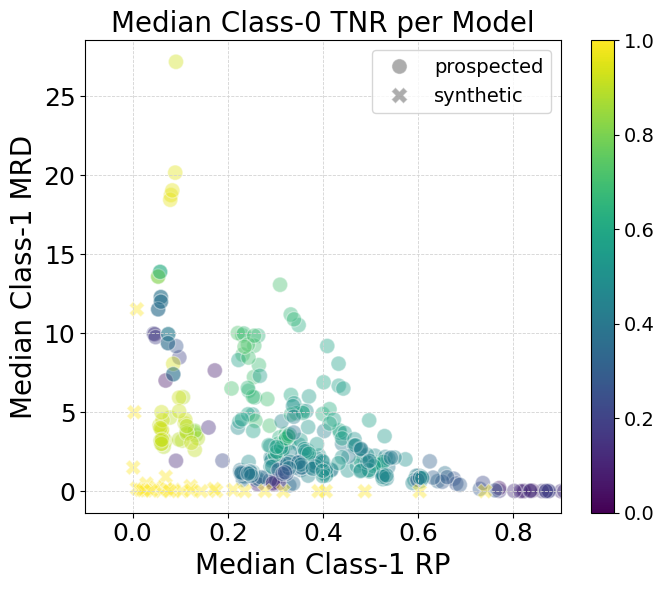

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(7,6))
df_under1 = df[df["tnrs"] < 1.0]
top_row = df_under1['tnrs'].idxmax()
top_idx = top_row

ax = sns.scatterplot(x='prevs', y='disps', hue="tnrs", s=120, alpha=0.4, data=df, style="style", palette=cpal)

# ax.figure.colorbar(sm)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    ax=ax,
)
cbar.ax.tick_params(labelsize=14) 

text = list(df["idx"])
# Loop for annotation of all points 
plt.annotate(text[top_idx], (prevs[top_idx]-0.06, disps[top_idx]-1.3), fontsize=16) 
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.yaxis.grid(color='lightgray', linestyle='--', linewidth=0.6)
ax.xaxis.grid(color='lightgray', linestyle='--', linewidth=0.6)

hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
    if l in ['synthetic', 'prospected']:
        lablout.append(l)
        handout.append(h)
ax.legend(handout, lablout, prop={'size': 14})

ax.set_xlim([-0.1, 0.9]) 
# ax.set_ylim([-1, 10])  

# Add labels and title
plt.xlabel('Median Class-1 RP', fontsize=20)
plt.ylabel('Median Class-1 MRD', fontsize=20)
plt.title('Median Class-0 TNR per Model', fontsize=20)
# Show plot
plt.tight_layout()
plt.show()

Note: This could be misleading. These are not higher for prospectors as an artifact of doing otsu thresholding even for class-0 data. Regardless of prospect map values, a threshold is found and used to select foreground and background. This is really not super helpful. Would rather make threshold as $>0$ top get all negative values in heatmap. For this reason, let's exclude for now.  


/tmp/user/22736/ipykernel_3647660/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_3647660/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_3647660/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_3647660/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

[<matplotlib.lines.Line2D object at 0x7f0ee4db77c0>, <matplotlib.lines.Line2D object at 0x7f0ee4db7a30>] ['prospected', 'synthetic']


/tmp/user/22736/ipykernel_3647660/3501475546.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


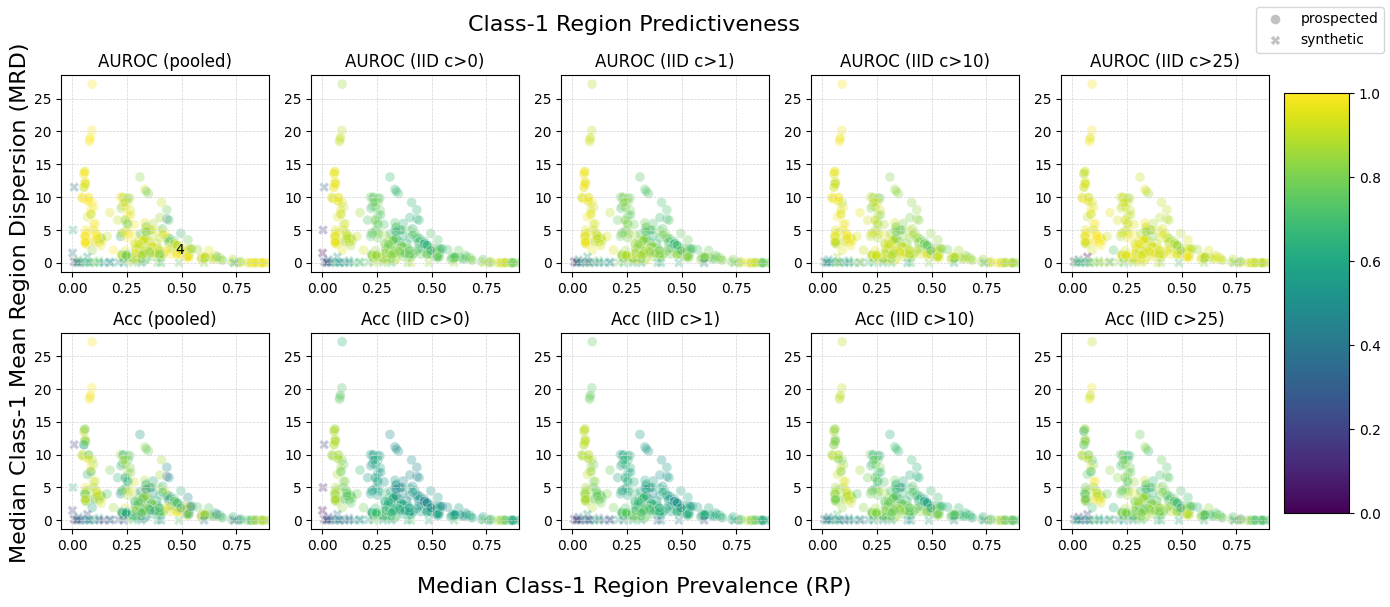

In [45]:
from matplotlib import cm

fig, axs = plt.subplots(2, 5, figsize=(13,6))
# text = [str(i) for i in idxs] 
text = list(df["idx"])
N = len(prevs)
# auc_data = [aucs, aucs1, aucs10, aucs25]
# score_data = [scores, scores1, scores10, scores25]

cutoffs = ["0", "1", "10", "25"]
for i,metric in enumerate(["aucs_sal", "aucs", "aucs1", "aucs10", "aucs25"]):
    axs[0,i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    axs[0,i].xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    metric_data = df[metric]
    top_idx = int(np.nanargmax(metric_data))
    # print(top_idx)
    # print(df.iloc[top_idx,:])
    sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=False, style="style", palette=cpal, ax=axs[0,i])
    # sns.scatterplot(x='prevs', y='disps', s=50, alpha=0.4, data=nan_df, legend=False, marker="x", color="gray", ax=axs[0,i])
    if i == 0:
        axs[0,i].set_title("AUROC (pooled)")
    else:
        axs[0,i].set_title("AUROC (IID c>" + cutoffs[i-1] + ")")
    # axs[0,i].set_xticks([])
    # if i > 0:
    #     axs[0,i].set_yticks([])
    axs[0,i].set_xlabel('')
    axs[0,i].set_ylabel('')
    
    # axs[0,i].set_xlim([-0.1, 1])     
    axs[0,i].set_xlim([-0.05, 0.9]) 
    # axs[0,i].set_ylim([-1, 10])  
    axs[0,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 

for i,metric in enumerate(["scores_sal", "scores", "scores1", 'scores10', 'scores25']):
    axs[1,i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    axs[1,i].xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    metric_data = df[metric]
    top_idx = int(np.nanargmax(metric_data))
    # print(top_idx)
    legend = False
    if i == 4:
        legend = True
    im = sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=legend, style="style", palette=cpal, ax=axs[1,i])
    # if legend == True:
    axs[1,i].legend().set_visible(False)
    
    im.collections[0].cmap.set_bad('grey')
    if i == 0:
        axs[1,i].set_title("Acc (pooled)")
    else:
        axs[1,i].set_title("Acc (IID c>" + cutoffs[i-1] + ")")
    # if i > 0:
        # axs[1,i].set_yticks([])
    axs[1,i].set_xlabel('')
    axs[1,i].set_ylabel('')
    
    axs[1,i].set_xlim([-0.05, 0.9]) 
    # axs[1,i].set_ylim([-1, 10])     
    axs[1,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 
    


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
fig.colorbar(cm.ScalarMappable(norm=None, cmap="viridis"), cax=cbar_ax)


hand, labl = im.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
    if l in ['synthetic', 'prospected']:
        lablout.append(l)
        handout.append(h)
print(handout, lablout)
fig.legend(handout, lablout, prop={'size': 10})


fig.supxlabel('Median Class-1 Region Prevalence (RP)', fontsize=16)
fig.supylabel('Median Class-1 Mean Region Dispersion (MRD)', fontsize=16)
plt.suptitle('Class-1 Region Predictiveness', fontsize=16)

plt.tight_layout()

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.show()

# Add cell probability baseline

In [46]:
# combine graphs in baseline_saliency and encoded_graphs_final
baseline_path = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/baseline_saliency"
encoded_path = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/encoded_graphs_final"
save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/baseline_emb"

In [47]:
from test_signal import merge_probs_embs
# merge_probs_embs(baseline_path, encoded_path, save_dir, notebook_flag=True)

In [48]:
from test_signal import analyze_probabilities
cache_dir = "/scr/biggest/gmachi/datasets/celldive_lung/analysis_cache_probs"
# stat_dict_probs = analyze_probabilities("cell_probs", label_dict, save_dir, cache_dir)

In [49]:
# serialize(stat_dict_probs, "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/prob_stat_dict.obj")
stat_dict_probs = deserialize("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/prob_stat_dict.obj")

In [50]:
probs_prev = np.median(stat_dict_probs["prev"])
probs_disp = np.median(stat_dict_probs["disp"])
x_probs,y_probs,auc_probs = probs_prev, probs_disp, stat_dict_probs["auc_score"][0]
print(x_probs,y_probs,auc_probs)


0.8463597430406852 0.04068594485541358 0.9291985740691842


0.8463597430406852 0.04068594485541358 0.9291985740691842

# Add a full graph pooling baseline

In [51]:
from test_signal import get_full_graph_pool_baseline
encoded_path = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/encoded_graphs_final"
# max_outs = get_full_graph_pool_baseline(encoded_path, label_dict, pool_fn="max")

In [52]:
max_outs = deserialize("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/full-pool-max.results")
max_outs

(0.9548387096774194, 0.8823529411764706)

(0.9548387096774194, 0.8823529411764706)

In [53]:
# serialize(max_outs, "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/full-pool-max.results")

In [54]:
# mean_outs = get_full_graph_pool_baseline(encoded_path, label_dict, pool_fn="mean")

In [55]:
mean_outs = deserialize("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/full-pool-mean.results")
mean_outs

(0.8780864197530863, 0.8235294117647058)

(0.8780864197530863, 0.8235294117647058)

In [56]:
# serialize(mean_outs, "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/full-pool-mean.results")

## Draw thresholds and inspect models

In [57]:
n=50
copy_df = df.copy().dropna()
copy_df = copy_df.sort_values('disps', ascending=False)
print(copy_df.head(n))

                                 model  idx     prevs      disps      tnrs  \
130  k11_r2_alpha0.0500_tau0.00_lamnan  141  0.090829  27.182040  0.930800   
258  k11_r3_alpha0.0500_tau0.00_lamnan  281  0.089245  20.166667  0.955653   
399  k11_r4_alpha0.0500_tau0.00_lamnan  424  0.083121  19.041322  0.960534   
115  k11_r6_alpha0.0500_tau0.00_lamnan  125  0.080249  18.750000  0.963722   
221  k11_r5_alpha0.0500_tau0.00_lamnan  238  0.078819  18.450183  0.963849   
20   k20_r8_alpha0.0500_tau0.00_lamnan   22  0.057544  13.884615  0.635265   
304  k20_r8_alpha0.0500_tau1.00_lamnan  327  0.057544  13.884615  0.635265   
275  k20_r7_alpha0.0500_tau0.00_lamnan  298  0.053447  13.586957  0.816467   
150  k20_r7_alpha0.0500_tau1.00_lamnan  163  0.053447  13.586957  0.816467   
131     k18_r8_alphanan_taunan_lam0.50  142  0.309568  13.071006  0.714950   
391  k20_r6_alpha0.0500_tau0.00_lamnan  416  0.059088  12.291073  0.397631   
96   k20_r6_alpha0.0500_tau1.00_lamnan  103  0.059088  12.291073

In [58]:
n=20
sort_scores_df = df.copy().dropna()
sort_scores_df = sort_scores_df.sort_values('scores', ascending=False)
print(sort_scores_df.head(n))

sort_aucs_df = df.copy().dropna()
sort_aucs_df = sort_aucs_df.sort_values('aucs', ascending=False)
print(sort_aucs_df.head(n))

                                 model  idx     prevs      disps      tnrs  \
27   k14_r2_alpha0.0500_tau0.00_lamnan   29  0.068996   3.195652  0.907834   
275  k20_r7_alpha0.0500_tau0.00_lamnan  298  0.053447  13.586957  0.816467   
448  k20_r4_alpha0.0500_tau1.00_lamnan  478  0.053433  11.516812  0.377041   
151  k13_r8_alpha0.0500_tau0.00_lamnan  164  0.056161   4.166667  0.927833   
323  k13_r7_alpha0.0500_tau0.00_lamnan  347  0.059795   3.000000  0.926488   
58   k12_r8_alpha0.0500_tau0.00_lamnan   64  0.820552   0.006376  0.141616   
465  k20_r5_alpha0.0500_tau1.00_lamnan  495  0.059228  12.000000  0.393833   
292  k20_r4_alpha0.0500_tau0.00_lamnan  315  0.053433  11.516812  0.377041   
386  k14_r4_alpha0.0500_tau0.00_lamnan  411  0.060554   3.000000  0.915323   
96   k20_r6_alpha0.0500_tau1.00_lamnan  103  0.059088  12.291073  0.397631   
486  k20_r3_alpha0.0500_tau0.00_lamnan  516  0.074054   9.375000  0.373862   
391  k20_r6_alpha0.0500_tau0.00_lamnan  416  0.059088  12.291073

In [59]:
df[df["idx"] == 41]["aucs"]

37    0.978849
Name: aucs, dtype: float64

In [60]:
df_synthetic = df[df["style"] == "synthetic"]
n=30
sort_aucs_df = df_synthetic.copy().dropna()
sort_aucs_df = sort_aucs_df.sort_values('aucs', ascending=True)
print(sort_aucs_df)

                 model  idx     prevs     disps  tnrs  aucs_sal  scores_sal  \
508     dummy_50-100_3  537  0.021786  0.070312   1.0  0.896605    0.784314   
493       dummy_1-50_3  522  0.008600  0.180000   1.0  0.761513    0.705882   
499      dummy_1-200_3  528  0.027823  0.051724   1.0  0.750784    0.725490   
496      dummy_1-100_3  525  0.016060  0.090000   1.0  0.906832    0.823529   
494      dummy_1-50_10  523  0.028799  0.482143   1.0  0.949074    0.843137   
497     dummy_1-100_10  526  0.048537  0.240602   1.0  0.906574    0.803922   
505     dummy_1-1000_3  534  0.103076  0.006969   1.0  0.945141    0.901961   
514    dummy_200-500_3  543  0.077951  0.009852   1.0  0.936027    0.843137   
495      dummy_1-50_25  524  0.069342  0.909320   1.0  0.885813    0.764706   
498     dummy_1-100_25  527  0.121660  0.323741   1.0  0.948276    0.862745   
500     dummy_1-200_10  529  0.086585  0.089776   1.0  0.915825    0.843137   
512   dummy_100-200_10  541  0.122500  0.051355   1.

In [61]:
df[df["model"] == "dummy_50-100_3"]["aucs"].values[0]

0.8554526748971194

In [62]:
dummy_best_auc = "dummy_500-1000_25"
dummy_worst_auc = "dummy_50-100_3"
dummy_best_aucsal = "dummy_1-1000_25"
dummy_worst_aucsal = "dummy_1-200_3"

0.8554526748971194


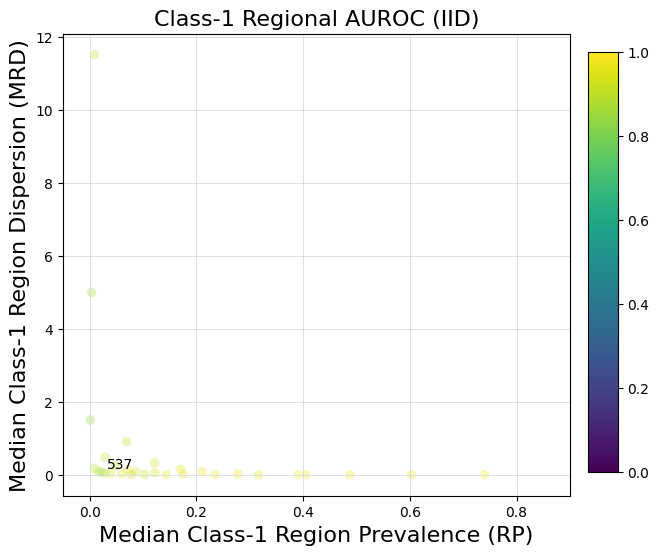

In [71]:
from matplotlib.colors import Normalize
from matplotlib import cm


cmap = plt.get_cmap('viridis')
cmap.set_bad(color='gray')
norm = Normalize(vmin=0, vmax=1)


fig, axs = plt.subplots(1, 1, figsize=(6,6))
text = list(df["idx"])
N = len(prevs)

model537 = df[df["idx"] == 537]
x537, y537 = model537["prevs"].values[0], model537["disps"].values[0]


cutoffs = ["0"]
for i,metric in enumerate(["aucs"]):
    axs.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
    axs.xaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
    metric_data = df[metric]
    top_idx = int(np.nanargmax(metric_data))

    sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df_synthetic, legend=False, style="style", palette=cpal, hue_norm=norm, ax=axs)
    axs.set_title("Class-1 Regional AUROC (IID)",  fontsize=16)
    axs.set_xlabel('Median Class-1 Region Prevalence (RP)', fontsize=16)
    axs.set_ylabel('Median Class-1 Region Dispersion (MRD)', fontsize=16)

    axs.set_xlim([-0.05, 0.9]) 
    axs.annotate("537", (x537+0.01, y537+0.1))
    print(model537["aucs"].values[0])
    
    fig.subplots_adjust(right=0.97)
    cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax)
    

# Plot the scatterplot for model selection

0.9648141120978617


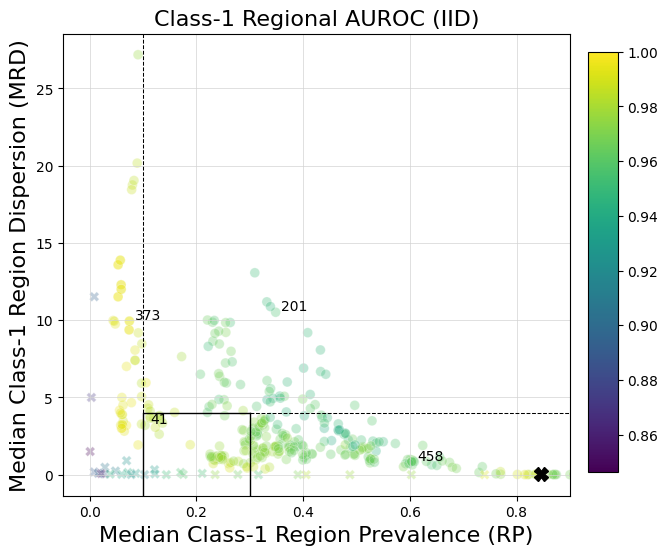

In [73]:
from matplotlib.colors import Normalize
from matplotlib import cm

cmap = plt.get_cmap('viridis')
cmap.set_bad(color='gray')

fig, axs = plt.subplots(1, 1, figsize=(6,6))
text = list(df["idx"])
N = len(prevs)
# auc_data = [aucs, aucs1, aucs10, aucs25]
# score_data = [scores, scores1, scores10, scores25]
model41 = df[df["idx"] == 41]
x41, y41 = model41["prevs"].values[0], model41["disps"].values[0]
model201 = df[df["idx"] == 201]
x201, y201 = model201["prevs"].values[0], model201["disps"].values[0]
model373 = df[df["idx"] == 373]
x373, y373 = model373["prevs"].values[0], model373["disps"].values[0]
model458 = df[df["idx"] == 458]
x458, y458 = model458["prevs"].values[0], model458["disps"].values[0]

cutoffs = ["0"]
for i,metric in enumerate(["aucs"]):
    axs.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
    axs.xaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
    metric_data = df[metric]
    norm = Normalize(vmin=metric_data.min(), vmax=1)
    top_idx = int(np.nanargmax(metric_data))

    axs.axhline(y=4, xmin=0.37, xmax=1.0, color='k', linestyle='--', linewidth=0.75)
    axs.axhline(y=4, xmin=0.16, xmax=0.37, color='k', linestyle='-', linewidth=1)
    axs.axvline(x=0.1, ymin=0.18, color='k', linestyle='--', linewidth=0.75)
    axs.axvline(x=0.1, ymin=0.0, ymax=0.18, color='k', linestyle='-', linewidth=1)
    axs.axvline(x=0.3, ymin=0.0, ymax=0.18, color='k', linestyle='-', linewidth=1)

    sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=False, style="style", hue_norm=norm, palette=cmap, ax=axs)
    
    axs.set_title("Class-1 Regional AUROC (IID)",  fontsize=16)
    axs.set_xlabel('Median Class-1 Region Prevalence (RP)', fontsize=16)
    axs.set_ylabel('Median Class-1 Region Dispersion (MRD)', fontsize=16)
    axs.plot(x_probs,y_probs, color="k", marker='X', markersize=10)
    
    axs.set_xlim([-0.05, 0.9]) 
    axs.annotate("41", (x41+0.01, y41+0.1)) 
    axs.annotate("201", (x201+0.01, y201+0.1)) 
    axs.annotate("373", (x373+0.01, y373+0.1)) 
    axs.annotate("458", (x458+0.01, y458+0.1))
    print(model458["aucs"].values[0])

    fig.subplots_adjust(right=0.97)
    cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax)
    
 


## get some exemplar outputs

In [200]:
IDX = 201
model_str = df[df["idx"] == IDX]["model"].values[0] + ".model"
model_str

'k18_r5_alphanan_taunan_lam0.50.model'

In [201]:
df[df["idx"] == IDX]

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
186,k18_r5_alphanan_taunan_lam0.50,201,0.34865,10.515648,0.633006,0.955592,0.941176,0.955499,0.887129,0.947404,0.881826,0.959897,0.893443,0.949931,0.877778,prospected


In [202]:
model_dir = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results_final/k2models"
G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/"
model_path = os.path.join(model_dir, model_str)
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [203]:
from utils import deserialize_model
model = deserialize_model(model_path)

In [204]:
from test_signal import generate_hypothesis
ID = 87
G_path = os.path.join(G_dir, "S" + str(ID) + ".obj")
B = generate_hypothesis(model, G_path)

min/max values: 0 1


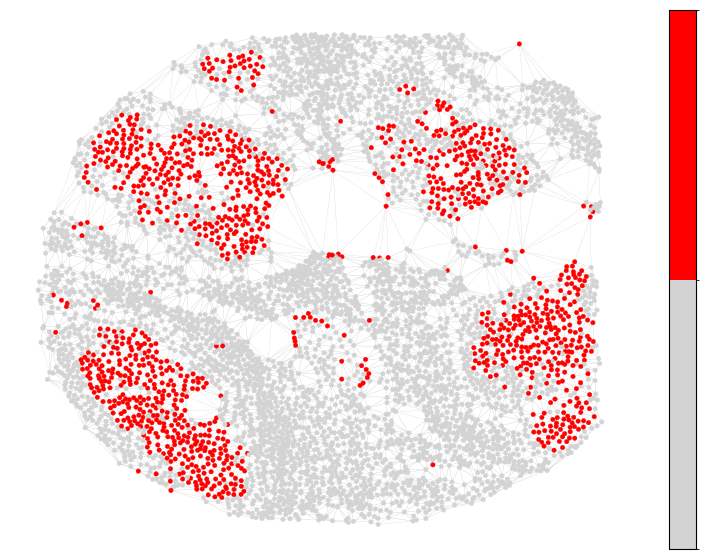

In [205]:
from utils import visualize_cell_graph
_ = visualize_cell_graph(B, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

# Filter models based on RP and MRD
- We can apply the thresholds of 0.1 <= RP <= 0.3 and MRD < 4

In [86]:
island_df = df[(df["prevs"] <= 0.3) & (df["prevs"] >= 0.1) & (df["disps"] <= 4)]
island_df.shape

(61, 16)

In [87]:
island_df.head()

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
3,k16_r8_alpha10000000000.0000_tau1.00_lamnan,3,0.225752,1.336602,0.415198,0.934921,0.882353,0.975378,0.919750,0.979051,0.934401,0.990295,0.942308,0.969504,0.934579,prospected
6,k17_r7_alpha10000000000.0000_tau1.00_lamnan,7,0.235123,0.930976,0.377017,0.992063,0.960784,0.974688,0.912592,0.962091,0.926325,0.980229,0.906736,0.996443,0.970297,prospected
10,k14_r7_alpha10000000000.0000_tau1.00_lamnan,11,0.132579,3.555696,0.825494,0.995385,0.941176,0.980115,0.938622,0.980777,0.933408,0.994282,0.977778,0.991210,0.944954,prospected
13,k14_r4_alpha10000000000.0000_tau1.00_lamnan,14,0.130440,2.623591,0.910975,0.992236,0.980392,0.981171,0.938425,0.989433,0.952165,0.994845,0.971963,0.996216,0.972222,prospected
29,k16_r4_alpha10000000000.0000_tau1.00_lamnan,32,0.238571,1.032258,0.397410,0.927419,0.843137,0.976281,0.928082,0.977118,0.935085,0.996248,0.965686,0.986458,0.963303,prospected


In [88]:
island_df.to_csv("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_filtered_final.csv")

In [92]:
from matplotlib import cm

def plot_scatters(df, cpal):
    fig, axs = plt.subplots(2, 5, figsize=(13,6))
    # text = [str(i) for i in idxs] 
    text = list(df["idx"])
    
    prevs = list(df["prevs"])
    disps = list(df["disps"])
    
    N = len(prevs)
    # auc_data = [aucs, aucs1, aucs10, aucs25]
    # score_data = [scores, scores1, scores10, scores25]
    
    cutoffs = ["0", "1", "10", "25"]
    for i,metric in enumerate(["aucs_sal", "aucs", "aucs1", "aucs10", "aucs25"]):
        axs[0,i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
        axs[0,i].xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
        metric_data = df[metric]
        top_idx = int(np.nanargmax(metric_data))
        # print(top_idx)
        # print(df.iloc[top_idx,:])
        sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=False, style="style", palette=cpal, ax=axs[0,i])
        # sns.scatterplot(x='prevs', y='disps', s=50, alpha=0.4, data=nan_df, legend=False, marker="x", color="gray", ax=axs[0,i])
        if i == 0:
            axs[0,i].set_title("AUROC (pooled)")
        else:
            axs[0,i].set_title("AUROC (IID c>" + cutoffs[i-1] + ")")
        # axs[0,i].set_xticks([])
        # if i > 0:
        #     axs[0,i].set_yticks([])
        axs[0,i].set_xlabel('')
        axs[0,i].set_ylabel('')
        
        # axs[0,i].set_xlim([-0.1, 1])     
        axs[0,i].set_xlim([0.08, 0.32]) 
        # axs[0,i].set_ylim([-1, 10])  
        axs[0,i].annotate(text[top_idx], (prevs[top_idx]+0.01, disps[top_idx]+0.01)) 

    for i,metric in enumerate(["scores_sal", "scores", "scores1", 'scores10', 'scores25']):
        axs[1,i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
        axs[1,i].xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
        metric_data = df[metric]
        top_idx = int(np.nanargmax(metric_data))
        # print(top_idx)
        
        legend = False
        if i == 4:
            legend = True
        im = sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=legend, style="style", palette=cpal, ax=axs[1,i])
        # if legend == True:
        axs[1,i].legend().set_visible(False)
        
        im.collections[0].cmap.set_bad('grey')
        if i == 0:
            axs[1,i].set_title("Acc (pooled)")
        else:
            axs[1,i].set_title("Acc (IID c>" + cutoffs[i-1] + ")")
        # if i > 0:
            # axs[1,i].set_yticks([])
        axs[1,i].set_xlabel('')
        axs[1,i].set_ylabel('')
        
        axs[1,i].set_xlim([0.08, 0.32]) 
        # axs[1,i].set_ylim([-1, 10])     
        axs[1,i].annotate(text[top_idx], (prevs[top_idx]+0.01, disps[top_idx]+0.01)) 
        

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
    fig.colorbar(cm.ScalarMappable(norm=None, cmap="viridis"), cax=cbar_ax)

    hand, labl = im.get_legend_handles_labels()
    handout=[]
    lablout=[]
    for h,l in zip(hand,labl):
        if l in ['synthetic', 'prospected']:
            lablout.append(l)
            handout.append(h)
    print(handout, lablout)
    fig.legend(handout, lablout, prop={'size': 10})

    fig.supxlabel('Median Class-1 Region Prevalence (RP)', fontsize=16)
    fig.supylabel('Median Class-1 Mean Region Dispersion (MRD)', fontsize=16)
    plt.suptitle('Class-1 Region Predictiveness', fontsize=16)

    plt.tight_layout()
    plt.show()

23
21
21
43
6
23
21
21
43
6


/tmp/user/22736/ipykernel_2374273/1169165126.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_2374273/1169165126.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_2374273/1169165126.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_2374273/1169165126.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

[<matplotlib.lines.Line2D object at 0x7f18d868eb90>, <matplotlib.lines.Line2D object at 0x7f18d85b4130>] ['prospected', 'synthetic']


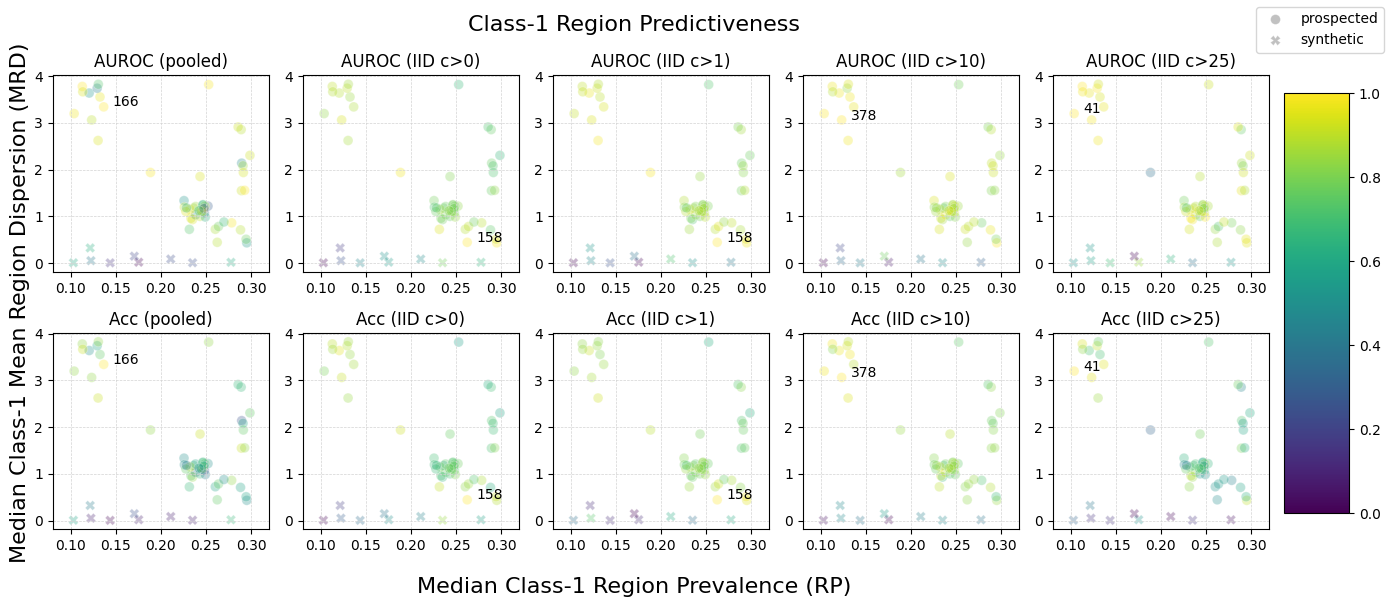

In [93]:
plot_scatters(island_df, cpal)

41 : 0.06749858196256386
158 : 0.05807212028542308
166 : 0.06024808033077378
378 : 0.048635473606918556


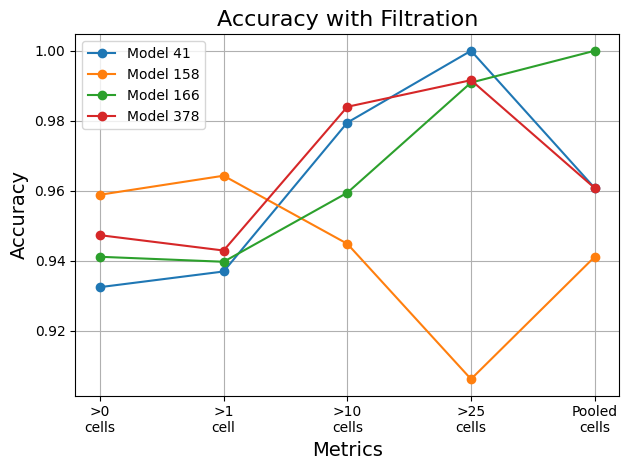

In [111]:

# Extract the accuracy scores for each row and plot them
deltas = []
for index, row in island_df.iterrows():
    if row["idx"] in [41, 166, 378, 158]:
        acc_scores = [row['scores'], row['scores1'], row['scores10'], row['scores25'], row['scores_sal']]
        delta = np.abs(np.nanmax(acc_scores) - np.nanmin(acc_scores))
        deltas.append(delta)
        print(row["idx"],":", delta)
        plt.plot(acc_scores, label=f'Model {row["idx"]}', marker='o', alpha=1)

# Add labels and title
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy with Filtration', fontsize=16)
plt.xticks([0,1,2,3,4], [">0\ncells", ">1\ncell", ">10\ncells", ">25\ncells", "Pooled\ncells"])
plt.grid(True)
plt.tight_layout()
plt.legend()

# Show plot
plt.show()

41 : 0.02115063809568063
158 : 0.013066230536141976
166 : 0.01823761643328592
378 : 0.012657938689161319


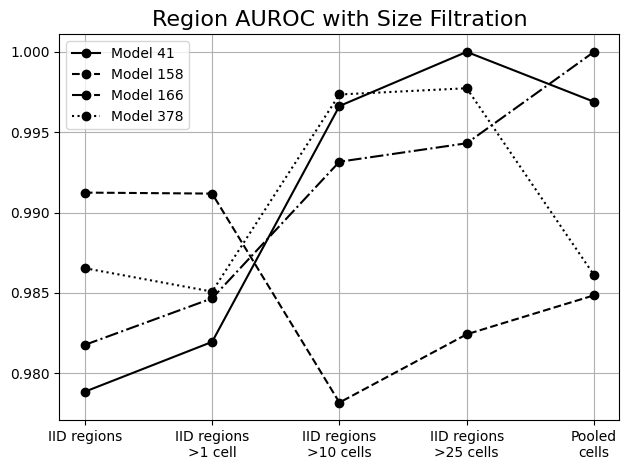

In [332]:

# Extract the accuracy scores for each row and plot them
deltas = []
ls = ['-', '--', '-.', ':']
i = 0
for index, row in island_df.iterrows():
    if row["idx"] in [41, 166, 378, 158]:
        acc_scores = [row['aucs'], row['aucs1'], row['aucs10'], row['aucs25'], row['aucs_sal']]
        delta = np.abs(np.nanmax(acc_scores) - np.nanmin(acc_scores))
        deltas.append(delta)
        print(row["idx"], ":",delta)
        plt.plot(acc_scores, label=f'Model {row["idx"]}', marker='o', alpha=1, color="k", linestyle=ls[i])
        i += 1

# Add labels and title
# plt.xlabel('Metrics', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)
plt.title('Region AUROC with Size Filtration', fontsize=16)
plt.xticks([0,1,2,3,4], ["IID regions", "IID regions\n>1 cell", "IID regions\n>10 cells", "IID regions\n>25 cells", "Pooled\ncells"])
plt.grid(True)
plt.tight_layout()
plt.legend()

# Show plot
plt.show()

# Choose a model?

used to be: 81, 0, 120

In [56]:
df[df["idx"] == 34] # auc all sal


,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
31,k14_r6_alpha0.0500_tau0.00_lamnan,34,0.062957,3.454059,0.899376,1.0,0.980392,0.987611,0.953175,0.989564,0.955364,0.982556,0.944056,0.959954,0.901639,prospected


In [57]:
df[df["idx"] == 29] # auc c>0, acc c>0


,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
27,k14_r2_alpha0.0500_tau0.00_lamnan,29,0.068996,3.195652,0.907834,0.996923,0.960784,0.99694,0.978723,0.991212,0.963259,0.995718,0.962025,0.988855,0.941176,prospected


In [58]:
df[df["idx"] == 373] # AUC c>1, auc c>10

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
348,k20_r1_alpha0.0500_tau1.00_lamnan,373,0.07459,9.941176,0.42751,0.998413,0.960784,0.994614,0.967821,0.995666,0.974617,0.998891,0.979167,0.973923,0.952381,prospected


In [59]:
df[df["idx"] == 41] # AUC c>25

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
37,k12_r5_alpha10000000000.0000_tau1.00_lamnan,41,0.103891,3.2,0.897959,0.996894,0.960784,0.978849,0.932501,0.98195,0.936978,0.996629,0.979487,1.0,1.0,prospected


In [60]:
df[df["idx"] == 166] # acc all sal

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
153,k14_r5_alpha10000000000.0000_tau1.00_lamnan,166,0.136673,3.34336,0.896255,1.0,1.0,0.981762,0.941176,0.98466,0.939752,0.993162,0.959459,0.994312,0.990909,prospected


In [61]:
df[df["idx"] == 347] # acc c>1

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
323,k13_r7_alpha0.0500_tau0.00_lamnan,347,0.059795,3.0,0.926488,0.993548,0.941176,0.996234,0.973699,0.995143,0.976154,0.985287,0.93985,0.911977,0.833333,prospected


In [62]:
df[df["idx"] == 112] # acc c>10

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
105,k12_r1_alpha0.0500_tau0.00_lamnan,112,0.105689,5.957337,0.891803,0.995161,0.980392,0.994983,0.967515,0.994315,0.966456,0.993333,0.984576,0.998918,0.984375,prospected


In [63]:
df[df["idx"] == 505]

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
475,k13_r5_alpha0.0500_tau0.00_lamnan,505,0.060995,3.261851,0.928303,1.0,1.0,0.993904,0.969376,0.995329,0.966427,0.985159,0.934307,0.983591,0.907692,prospected


In [64]:
df[df["idx"] == 382]

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
357,k12_r6_alpha10000000000.0000_tau1.00_lamnan,382,0.113431,4.124816,0.890693,1.0,0.980392,0.98223,0.939144,0.981749,0.940771,0.997912,0.979592,0.997455,0.952381,prospected


In [65]:
df[df["idx"] == 378] 

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
353,k13_r3_alpha10000000000.0000_tau1.00_lamnan,378,0.123316,3.063725,0.917894,0.986111,0.960784,0.986536,0.947345,0.985078,0.942961,0.997347,0.984,0.997736,0.991597,prospected


In [84]:
df[df["idx"] == 158] 

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
146,k15_r1_alpha0.0500_tau0.00_lamnan,158,0.26259,0.444444,0.125139,0.984848,0.941176,0.991241,0.958883,0.991179,0.964322,0.978175,0.944882,0.982422,0.90625,prospected


In [85]:
df[df["idx"] == 111] 

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
104,k13_r5_alpha10000000000.0000_tau1.00_lamnan,111,0.10923,4.297665,0.923897,1.0,0.980392,0.984467,0.946407,0.9862,0.947541,0.993369,0.972973,0.999636,0.990566,prospected


### make a df of the above models

In [66]:
idxs = [34, 29, 373, 41, 166, 347, 112, 505, 382, 378]
top_df = df[df["idx"].isin(idxs)]
top_df


,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
27,k14_r2_alpha0.0500_tau0.00_lamnan,29,0.068996,3.195652,0.907834,0.996923,0.960784,0.996940,0.978723,0.991212,0.963259,0.995718,0.962025,0.988855,0.941176,prospected
31,k14_r6_alpha0.0500_tau0.00_lamnan,34,0.062957,3.454059,0.899376,1.000000,0.980392,0.987611,0.953175,0.989564,0.955364,0.982556,0.944056,0.959954,0.901639,prospected
37,k12_r5_alpha10000000000.0000_tau1.00_lamnan,41,0.103891,3.200000,0.897959,0.996894,0.960784,0.978849,0.932501,0.981950,0.936978,0.996629,0.979487,1.000000,1.000000,prospected
105,k12_r1_alpha0.0500_tau0.00_lamnan,112,0.105689,5.957337,0.891803,0.995161,0.980392,0.994983,0.967515,0.994315,0.966456,0.993333,0.984576,0.998918,0.984375,prospected
153,k14_r5_alpha10000000000.0000_tau1.00_lamnan,166,0.136673,3.343360,0.896255,1.000000,1.000000,0.981762,0.941176,0.984660,0.939752,0.993162,0.959459,0.994312,0.990909,prospected
323,k13_r7_alpha0.0500_tau0.00_lamnan,347,0.059795,3.000000,0.926488,0.993548,0.941176,0.996234,0.973699,0.995143,0.976154,0.985287,0.939850,0.911977,0.833333,prospected
348,k20_r1_alpha0.0500_tau1.00_lamnan,373,0.074590,9.941176,0.427510,0.998413,0.960784,0.994614,0.967821,0.995666,0.974617,0.998891,0.979167,0.973923,0.952381,prospected
353,k13_r3_alpha10000000000.0000_tau1.00_lamnan,378,0.123316,3.063725,0.917894,0.986111,0.960784,0.986536,0.947345,0.985078,0.942961,0.997347,0.984000,0.997736,0.991597,prospected
357,k12_r6_alpha10000000000.0000_tau1.00_lamnan,382,0.113431,4.124816,0.890693,1.000000,0.980392,0.982230,0.939144,0.981749,0.940771,0.997912,0.979592,0.997455,0.952381,prospected
475,k13_r5_alpha0.0500_tau0.00_lamnan,505,0.060995,3.261851,0.928303,1.000000,1.000000,0.993904,0.969376,0.995329,0.966427,0.985159,0.934307,0.983591,0.907692,prospected


# Try radar plots

In [67]:
prospected_df = df[df["style"] == "prospected"].dropna() # island_df[island_df["style"] == "prospected"]
prospected_df["k"] = prospected_df["model"].apply(lambda x: x.split("_")[0].split("k")[1])
prospected_df["r"] = prospected_df["model"].apply(lambda x: x.split("_")[1].split("r")[1])
prospected_df.head()

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style,k,r
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0,0.324876,3.239617,0.619698,0.996711,0.980392,0.968657,0.910824,0.970019,0.912558,0.986653,0.955189,0.985668,0.959184,prospected,13,6
1,k8_r5_alpha0.0500_tau0.00_lamnan,1,0.870919,0.012370,0.209294,0.961180,0.862745,0.968527,0.912711,0.969975,0.910280,0.974711,0.934426,0.923810,0.849315,prospected,8,5
2,k12_r3_alphanan_taunan_lam0.50,2,0.388976,1.817396,0.360339,0.989028,0.921569,0.952559,0.883923,0.954421,0.891044,0.970989,0.916201,0.970069,0.902857,prospected,12,3
3,k16_r8_alpha10000000000.0000_tau1.00_lamnan,3,0.225752,1.336602,0.415198,0.934921,0.882353,0.975378,0.919750,0.979051,0.934401,0.990295,0.942308,0.969504,0.934579,prospected,16,8
4,k10_r2_alpha10000000000.0000_tau0.00_lamnan,4,0.451939,1.322137,0.529915,1.000000,0.980392,0.961360,0.895448,0.957778,0.896986,0.984687,0.955696,0.991805,0.969957,prospected,10,2


In [68]:
prospected_df.shape

(347, 18)

In [69]:
columns = ["model", "prevs", "disps", "aucs", "scores", "k", "r", "idx"]
metrics_df = prospected_df[columns]

metrics_df["inv_prevs"] = metrics_df["prevs"]
metrics_df["inv_prevs"] = metrics_df["inv_prevs"].apply(lambda x: 1 - x)

metrics_df["inv_k"] = metrics_df["k"]
metrics_df["inv_k"] = metrics_df["inv_k"].apply(lambda x: 1.0 / (1.0 + int(x)))
min_k = metrics_df["inv_k"].min()
max_k = metrics_df["inv_k"].max()
metrics_df["fs_k"] = metrics_df["inv_k"].apply(lambda x: (x - min_k) / (max_k - min_k))

metrics_df["inv_r"] = metrics_df["r"]
metrics_df["inv_r"] = metrics_df["inv_r"].apply(lambda x: 1.0 / (1.0 + int(x)))
min_r = metrics_df["inv_r"].min()
max_r = metrics_df["inv_r"].max()
metrics_df["fs_r"] = metrics_df["inv_r"].apply(lambda x: (x - min_r) / (max_r - min_r))

metrics_df["inv_disps"] = metrics_df["disps"]
metrics_df["inv_disps"] = metrics_df["inv_disps"].apply(lambda x: 1.0 / (1.0 + x))
min_d = metrics_df["inv_disps"].min()
max_d = metrics_df["inv_disps"].max()
metrics_df["fs_disps"] = metrics_df["inv_disps"].apply(lambda x: (x - min_d) / (max_d - min_d))

metrics_df.head()


/tmp/user/22736/ipykernel_2374273/3197544171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df["inv_prevs"] = metrics_df["prevs"]
/tmp/user/22736/ipykernel_2374273/3197544171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df["inv_prevs"] = metrics_df["inv_prevs"].apply(lambda x: 1 - x)
/tmp/user/22736/ipykernel_2374273/3197544171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,model,prevs,disps,aucs,scores,k,r,idx,inv_prevs,inv_k,fs_k,inv_r,fs_r,inv_disps,fs_disps
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0.324876,3.239617,0.968657,0.910824,13,6,0,0.675124,0.071429,0.375000,0.142857,0.081633,0.235870,0.207873
1,k8_r5_alpha0.0500_tau0.00_lamnan,0.870919,0.012370,0.968527,0.912711,8,5,1,0.129081,0.111111,1.000000,0.166667,0.142857,0.987781,0.987873
2,k12_r3_alphanan_taunan_lam0.50,0.388976,1.817396,0.952559,0.883923,12,3,2,0.611024,0.076923,0.461538,0.250000,0.357143,0.354938,0.331388
3,k16_r8_alpha10000000000.0000_tau1.00_lamnan,0.225752,1.336602,0.975378,0.919750,16,8,3,0.774248,0.058824,0.176471,0.111111,0.000000,0.427972,0.407151
4,k10_r2_alpha10000000000.0000_tau0.00_lamnan,0.451939,1.322137,0.961360,0.895448,10,2,4,0.548061,0.090909,0.681818,0.333333,0.571429,0.430638,0.409916


In [70]:
metrics_df.shape

(347, 15)

In [71]:
sample_df = metrics_df.copy()
print(sample_df.shape)

n = 1
sort_scores_df = sample_df.copy()
sort_scores_df = sort_scores_df.sort_values('scores', ascending=False)
print(sort_scores_df.head(n).index, sort_scores_df.tail(n).index)
sliced_scores_df = pd.concat([sort_scores_df.head(n), sort_scores_df.tail(n)])

sort_aucs_df = sample_df.copy()
sort_aucs_df = sort_aucs_df.sort_values('aucs', ascending=False)
print(sort_aucs_df.head(n).index, sort_aucs_df.tail(n).index)
sliced_aucs_df = pd.concat([sort_aucs_df.head(n), sort_aucs_df.tail(n)])

# sort_k_df = sample_df.copy()
# sort_k_df = sort_k_df.sort_values('fs_k', ascending=False)
# sliced_k_df = pd.concat([sort_k_df.head(n), sort_k_df.tail(n)])

# sort_p_df = sample_df.copy()
# sort_p_df = sort_p_df.sort_values('inv_prevs', ascending=False)
# sliced_p_df = pd.concat([sort_p_df.head(n), sort_p_df.tail(n)])

# sort_d_df = sample_df.copy()
# sort_d_df = sort_d_df.sort_values('fs_disps', ascending=False)
# sliced_d_df = pd.concat([sort_d_df.head(n), sort_d_df.tail(n)])

# sort_r_df = sample_df.copy()
# sort_r_df = sort_r_df.sort_values('fs_r', ascending=False)
# sliced_r_df = pd.concat([sort_r_df.head(n), sort_r_df.tail(n)])


sample_df = pd.concat([sliced_scores_df, sliced_aucs_df])


# sample_df = pd.concat([sliced_scores_df, sliced_aucs_df, sliced_k_df, sliced_p_df, sliced_d_df, sliced_r_df])
# sample_df = pd.concat([sliced_scores_df, sliced_aucs_df])
# sample_df = sample_df.sample(5)
sample_df = sample_df.drop_duplicates()
sample_df

(347, 15)
Index([27], dtype='int64') Index([473], dtype='int64')
Index([27], dtype='int64') Index([419], dtype='int64')


,model,prevs,disps,aucs,scores,k,r,idx,inv_prevs,inv_k,fs_k,inv_r,fs_r,inv_disps,fs_disps
27,k14_r2_alpha0.0500_tau0.00_lamnan,0.068996,3.195652,0.996940,0.978723,14,2,29,0.931004,0.066667,0.300000,0.333333,0.571429,0.238342,0.210437
473,k10_r6_alpha0.0500_tau0.00_lamnan,0.925846,0.000798,0.939694,0.850000,10,6,503,0.074154,0.090909,0.681818,0.142857,0.081633,0.999203,0.999722
419,k19_r3_alphanan_taunan_lam0.50,0.468312,2.910591,0.939384,0.864361,19,3,445,0.531688,0.050000,0.037500,0.250000,0.357143,0.255716,0.228460


### append top contenders too

In [72]:
contenders_df = metrics_df[metrics_df["idx"].isin(idxs)]
contenders_df

,model,prevs,disps,aucs,scores,k,r,idx,inv_prevs,inv_k,fs_k,inv_r,fs_r,inv_disps,fs_disps
27,k14_r2_alpha0.0500_tau0.00_lamnan,0.068996,3.195652,0.996940,0.978723,14,2,29,0.931004,0.066667,0.300000,0.333333,0.571429,0.238342,0.210437
31,k14_r6_alpha0.0500_tau0.00_lamnan,0.062957,3.454059,0.987611,0.953175,14,6,34,0.937043,0.066667,0.300000,0.142857,0.081633,0.224514,0.196093
37,k12_r5_alpha10000000000.0000_tau1.00_lamnan,0.103891,3.200000,0.978849,0.932501,12,5,41,0.896109,0.076923,0.461538,0.166667,0.142857,0.238095,0.210181
105,k12_r1_alpha0.0500_tau0.00_lamnan,0.105689,5.957337,0.994983,0.967515,12,1,112,0.894311,0.076923,0.461538,0.500000,1.000000,0.143733,0.112294
153,k14_r5_alpha10000000000.0000_tau1.00_lamnan,0.136673,3.343360,0.981762,0.941176,14,5,166,0.863327,0.066667,0.300000,0.166667,0.142857,0.230237,0.202029
323,k13_r7_alpha0.0500_tau0.00_lamnan,0.059795,3.000000,0.996234,0.973699,13,7,347,0.940205,0.071429,0.375000,0.125000,0.035714,0.250000,0.222530
348,k20_r1_alpha0.0500_tau1.00_lamnan,0.074590,9.941176,0.994614,0.967821,20,1,373,0.925410,0.047619,0.000000,0.500000,1.000000,0.091398,0.058003
353,k13_r3_alpha10000000000.0000_tau1.00_lamnan,0.123316,3.063725,0.986536,0.947345,13,3,378,0.876684,0.071429,0.375000,0.250000,0.357143,0.246080,0.218463
357,k12_r6_alpha10000000000.0000_tau1.00_lamnan,0.113431,4.124816,0.982230,0.939144,12,6,382,0.886569,0.076923,0.461538,0.142857,0.081633,0.195129,0.165609
475,k13_r5_alpha0.0500_tau0.00_lamnan,0.060995,3.261851,0.993904,0.969376,13,5,505,0.939005,0.071429,0.375000,0.166667,0.142857,0.234640,0.206596


In [73]:
# append contenders to sample_df
final_df = pd.concat([sample_df, contenders_df])

In [74]:
columns = ["model", "inv_prevs", "fs_disps", "aucs", "scores", "fs_k", "fs_r"]
sample_df = sample_df[columns]
final_df = final_df[columns]
final_df

,model,inv_prevs,fs_disps,aucs,scores,fs_k,fs_r
27,k14_r2_alpha0.0500_tau0.00_lamnan,0.931004,0.210437,0.996940,0.978723,0.300000,0.571429
473,k10_r6_alpha0.0500_tau0.00_lamnan,0.074154,0.999722,0.939694,0.850000,0.681818,0.081633
419,k19_r3_alphanan_taunan_lam0.50,0.531688,0.228460,0.939384,0.864361,0.037500,0.357143
27,k14_r2_alpha0.0500_tau0.00_lamnan,0.931004,0.210437,0.996940,0.978723,0.300000,0.571429
31,k14_r6_alpha0.0500_tau0.00_lamnan,0.937043,0.196093,0.987611,0.953175,0.300000,0.081633
37,k12_r5_alpha10000000000.0000_tau1.00_lamnan,0.896109,0.210181,0.978849,0.932501,0.461538,0.142857
105,k12_r1_alpha0.0500_tau0.00_lamnan,0.894311,0.112294,0.994983,0.967515,0.461538,1.000000
153,k14_r5_alpha10000000000.0000_tau1.00_lamnan,0.863327,0.202029,0.981762,0.941176,0.300000,0.142857
323,k13_r7_alpha0.0500_tau0.00_lamnan,0.940205,0.222530,0.996234,0.973699,0.375000,0.035714
348,k20_r1_alpha0.0500_tau1.00_lamnan,0.925410,0.058003,0.994614,0.967821,0.000000,1.000000


In [75]:
#adapted from: https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python

import numpy as np
from math import pi

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)


    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=12)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


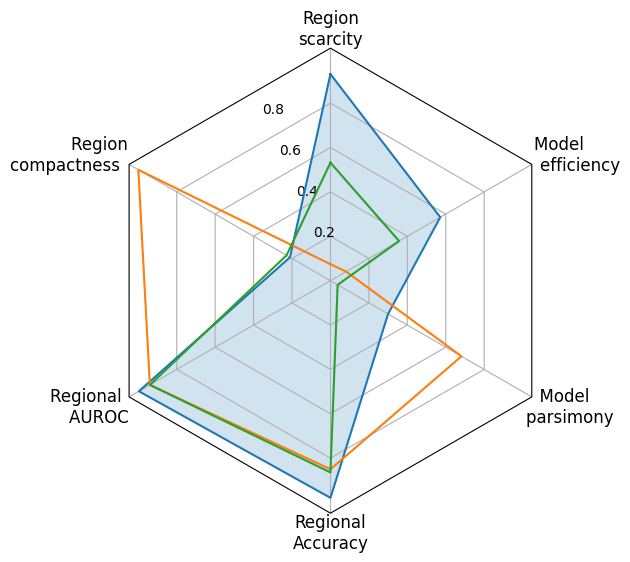

In [76]:
data = [["Region\nscarcity", "Region"+" "*5+"\ncompactness"+" "*18, "Regional"+" "*10+"\nAUROC"+" "*5,
         "Regional\nAccuracy", " "*6+"Model\n"+" "*8+"parsimony", " "*4+"Model\n"+" "*12+"efficiency"],
        ('Prospector\nSelection', list(sample_df.values[:,1:]))] # used to be fianl_df

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
# ax.set_title(title,  position=(0.1, -0.5), ha='center', fontsize=16)

for i,d in enumerate(case_data):
    line = ax.plot(theta, d)
    if i == 0:
        ax.fill(theta, d, alpha=0.2, label='Top Acc/AUROC')
    else:
        if i == 1:
            l = "Lowest Acc"
        else:
            l = "Lowest AUROC"
        ax.fill(theta, d, alpha=0.1, fill=False, label=l)

ax.set_varlabels(spoke_labels)
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

[0.9788493619043194, 0.9819500154273372, 0.9966294501790605, 1.0, 0.9968944099378882]


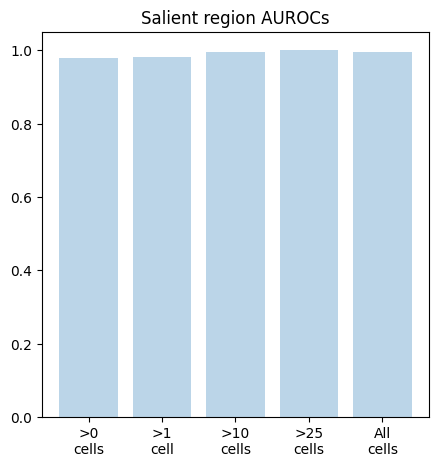

In [282]:
res = df[df["idx"] == 41]
region_aucs = [res["aucs"].values[0], res["aucs1"].values[0], res["aucs10"].values[0], res["aucs25"].values[0], res["aucs_sal"].values[0]] 
print(region_aucs)
# region_aucs = [0.86, 0.87, 0.93, 0.97, 1]
plt.figure(figsize=(5,5))
plt.bar(np.arange(5), region_aucs, color='C0', alpha=0.3)
plt.xticks(np.arange(5), [">0\ncells", ">1\ncell", ">10\ncells", ">25\ncells", "All\ncells"], rotation=0)
plt.title("Salient region AUROCs")
plt.show()

[0.9907817641560337, 0.8554526748971194]
[0.9545454545454546, 0.7507836990595611]


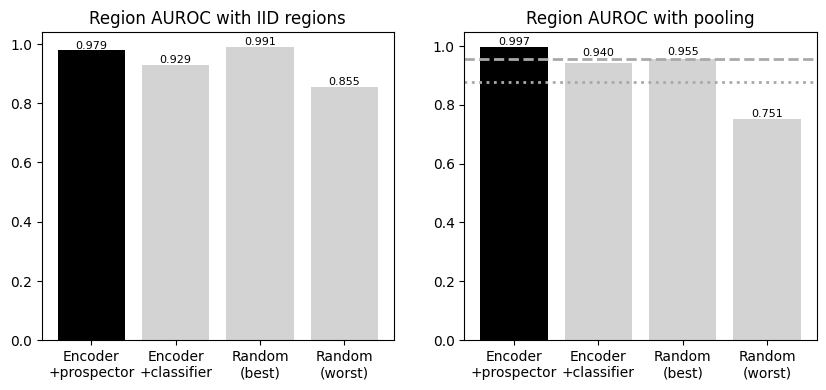

In [358]:
res = df[df["idx"] == 41]
region_aucs = [res["aucs"].values[0], res["aucs_sal"].values[0]] 

lines = [max_outs[0], mean_outs[0]]
auc_probs = [stat_dict_probs["auc_score"][0], stat_dict_probs["auc_score_sal"][0]]
aucs_dummy = [df[df["model"] == dummy_best_auc]["aucs"].values[0], df[df["model"] == dummy_worst_auc]["aucs"].values[0]]
print(aucs_dummy)
aucssal_dummy = [df[df["model"] == dummy_best_aucsal]["aucs_sal"].values[0], df[df["model"] == dummy_worst_aucsal]["aucs_sal"].values[0]]
print(aucssal_dummy)

fig, axs = plt.subplots(1, 2, figsize=(10,4))

aucs_bar = [region_aucs[0], auc_probs[0], aucs_dummy[0], aucs_dummy[1]]
axs[0].bar(np.arange(4), aucs_bar, color=["k","lightgray","lightgray","lightgray"])
axs[0].set_xticks(np.arange(4), ["Encoder\n+prospector", "Encoder\n+classifier", "Random\n(best)", "Random\n(worst)"], rotation=0)
axs[0].set_title("Region AUROC with IID regions")

rects = axs[0].patches
labels = ['{0:.3f}'.format(auc) for auc in aucs_bar]
for i, (rect, label) in enumerate(zip(rects, labels)):
    height = rect.get_height()
    buffer = 0
    axs[0].text(rect.get_x() + rect.get_width() / 2, height+buffer, label, ha="center", va="bottom", fontsize=8)

aucssal_bar = [region_aucs[1], auc_probs[1], aucssal_dummy[0], aucssal_dummy[1]]
axs[1].bar(np.arange(4), aucssal_bar, color=["k","lightgray","lightgray","lightgray"])
axs[1].set_xticks(np.arange(4), ["Encoder\n+prospector", "Encoder\n+classifier", "Random\n(best)", "Random\n(worst)"], rotation=0)
axs[1].set_title("Region AUROC with pooling")
axs[1].axhline(y=lines[0], color='darkgray', linestyle='--', linewidth=2)
axs[1].axhline(y=lines[1], color='darkgray', linestyle=':', linewidth=2)

rects = axs[1].patches
labels = ['{0:.3f}'.format(auc) for auc in aucssal_bar]
for i, (rect, label) in enumerate(zip(rects, labels)):
    height = rect.get_height()
    buffer = 0
    if i == 1:
        buffer = 0.02
    elif i == 2:
        buffer = 0.01
    axs[1].text(rect.get_x() + rect.get_width() / 2, height+buffer, label, ha="center", va="bottom", fontsize=8)

plt.show()